# ATP Tennis Data - Player History Diff Data (10 Matches)



### Results that did the best from Decision Tree Classifier with player diff + one hot encoded categorial features:


# Summary of Results


# Summary of Results




In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.decomposition import PCA
from datetime import datetime
import pickle
import json
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

from util import jupyter_util as ju
from util.model_util import ModelWrapper, REPORT_FILE, RSTATE, N_JOBS, MAX_ITER, LABEL_COL

%matplotlib inline
sns.set()


# date
DATE_FORMAT = '%Y-%m-%d'
DATE = datetime.now().strftime(DATE_FORMAT)

DESCRIPTION = "diff-ohe-history10_diff"


# update this
FEATURE_FILE = f'../datasets/atp_matches_1985-2019_features-diff-ohe-history10-matchup10.csv'

START_YEAR = 1998
END_YEAR = 2018




In [2]:
X_train, X_test, y_train, y_test = ju.get_data(FEATURE_FILE, LABEL_COL, START_YEAR, END_YEAR)

Our dataset actually has both historical data as well as matchup data. We will remove the matchup columns from the dataset

In [3]:
import re
matchup_columns = [col for col in X_train.columns if re.search('matchup', col)]
print(f'Before: X_train.shape {X_train.shape} X_test.shape {X_test.shape}')
X_train = X_train.drop(matchup_columns, axis=1)
X_test = X_test.drop(matchup_columns, axis=1)

# drop all history columns that doesn't have percentage
history_columns = [col for col in X_train.columns if re.search('history', col) and not re.search('diff', col)]
X_train = X_train.drop(history_columns, axis=1)
X_test = X_test.drop(history_columns, axis=1)

print(f'After: X_train.shape {X_train.shape} X_test.shape {X_test.shape}')

Before: X_train.shape (44429, 5295) X_test.shape (14810, 5295)
After: X_train.shape (44429, 5258) X_test.shape (14810, 5258)


In [4]:
[col for col in X_train.columns if re.search('history', col)]

['p1_history_win_percentage_diff',
 'p1_history_games_won_percentage_diff',
 'p1_history_sets_won_percentage_diff',
 'p1_history_wins_diff',
 'p1_history_losses_diff']

# Logistic Regression

In [5]:

# train our model

lr = ModelWrapper(LogisticRegression(n_jobs = N_JOBS, verbose = 1, random_state = RSTATE),
                  description = DESCRIPTION, 
                 data_file = FEATURE_FILE,
                  start_year = START_YEAR,
                  end_year = END_YEAR,
                   X_train = X_train,
                   y_train = y_train,
                   X_test = X_test,
                   y_test = y_test).fit()
y_predict_lr = lr.predict()

/Users/vinceluk/anaconda3/envs/capstone2/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/vinceluk/anaconda3/envs/capstone2/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:1544: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 4.
  " = {}.".format(effective_n_jobs(self.n_jobs)))


[LibLinear]

Model Score: 0.6648210668467252

ROC/AUC Score: 0.6648188590143217
              precision    recall  f1-score   support

        Loss       0.66      0.66      0.66      7381
         Win       0.67      0.67      0.67      7429

    accuracy                           0.66     14810
   macro avg       0.66      0.66      0.66     14810
weighted avg       0.66      0.66      0.66     14810

      Loss   Win
Loss  4902  2479
Win   2485  4944


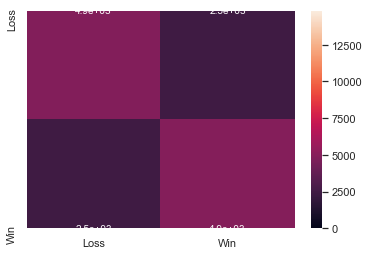

In [6]:
lr.analyze()

In [7]:
# ju.plot_2d(X_test, y_predict_lr)

In [8]:
lr.save()

Saving report: ../reports/summary.csv


# KNN

In [9]:

# train our model

knn = ModelWrapper(KNeighborsClassifier(n_jobs = N_JOBS),
                  description = DESCRIPTION, 
                 data_file = FEATURE_FILE,
                  start_year = START_YEAR,
                  end_year = END_YEAR,
                   X_train = X_train,
                   y_train = y_train,
                   X_test = X_test,
                   y_test = y_test).fit()
y_predict_knn = knn.predict()

Model Score: 0.6141120864280891

ROC/AUC Score: 0.6140885556916181
              precision    recall  f1-score   support

        Loss       0.61      0.61      0.61      7381
         Win       0.61      0.62      0.62      7429

    accuracy                           0.61     14810
   macro avg       0.61      0.61      0.61     14810
weighted avg       0.61      0.61      0.61     14810

      Loss   Win
Loss  4479  2902
Win   2813  4616


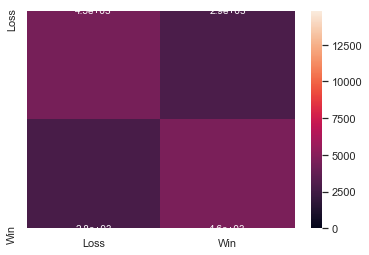

In [10]:
knn.analyze()

In [11]:
# ju.plot_2d(X_test, y_predict_knn)

In [12]:
knn.save()

Saving report: ../reports/summary.csv


# Decision Tree

In [13]:

# train our model

dt = ModelWrapper(DecisionTreeClassifier(random_state = RSTATE),
                  description = DESCRIPTION, 
                 data_file = FEATURE_FILE,
                  start_year = START_YEAR,
                  end_year = END_YEAR,
                   X_train = X_train,
                   y_train = y_train,
                   X_test = X_test,
                   y_test = y_test).fit()
y_predict_dt = dt.predict()

Model Score: 0.5841323430114788

ROC/AUC Score: 0.5841295064259043
              precision    recall  f1-score   support

        Loss       0.58      0.58      0.58      7381
         Win       0.59      0.59      0.59      7429

    accuracy                           0.58     14810
   macro avg       0.58      0.58      0.58     14810
weighted avg       0.58      0.58      0.58     14810

      Loss   Win
Loss  4305  3076
Win   3083  4346


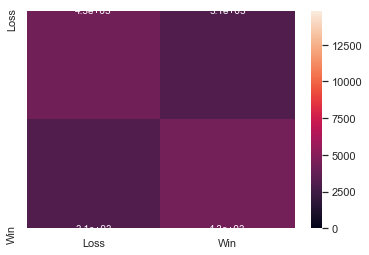

In [14]:
dt.analyze()

In [15]:
# ju.plot_2d(X_test, y_predict_dt)

In [16]:
dt.save()

Saving report: ../reports/summary.csv


# Random Forest Classifier

In [17]:

# train our model

rf = ModelWrapper(RandomForestClassifier(random_state=RSTATE, verbose=1),
                  description = DESCRIPTION, 
                 data_file = FEATURE_FILE,
                  start_year = START_YEAR,
                  end_year = END_YEAR,
                   X_train = X_train,
                   y_train = y_train,
                   X_test = X_test,
                   y_test = y_test).fit()
y_predict_rf = rf.predict()

/Users/vinceluk/anaconda3/envs/capstone2/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    7.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.1s finished


Model Score: 0.6284942606347063

ROC/AUC Score: 0.6287170810648806
              precision    recall  f1-score   support

        Loss       0.61      0.70      0.65      7381
         Win       0.65      0.56      0.60      7429

    accuracy                           0.63     14810
   macro avg       0.63      0.63      0.63     14810
weighted avg       0.63      0.63      0.63     14810

      Loss   Win
Loss  5148  2233
Win   3269  4160


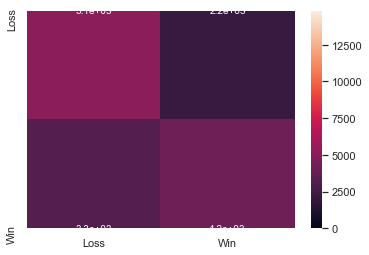

In [18]:
rf.analyze()

In [19]:
# ju.plot_2d(X_test, y_predict_rf)

In [20]:
rf.save()

Saving report: ../reports/summary.csv


# Gradient Boosting

In [21]:

# train our model

gb = ModelWrapper(GradientBoostingClassifier(random_state=RSTATE, verbose=1, n_iter_no_change = 4),
                  description = DESCRIPTION, 
                 data_file = FEATURE_FILE,
                  start_year = START_YEAR,
                  end_year = END_YEAR,
                   X_train = X_train,
                   y_train = y_train,
                   X_test = X_test,
                   y_test = y_test).fit()
y_predict_gb = gb.predict()

      Iter       Train Loss   Remaining Time 
         1           1.3627            9.31m
         2           1.3433            9.30m
         3           1.3272            9.26m
         4           1.3140            9.03m
         5           1.3029            8.85m
         6           1.2938            8.69m
         7           1.2860            8.57m
         8           1.2793            8.45m
         9           1.2737            8.34m
        10           1.2689            8.23m
        20           1.2445            7.23m
        30           1.2347            6.37m
        40           1.2289            5.48m
        50           1.2245            4.53m
        60           1.2207            3.59m
        70           1.2178            2.68m
        80           1.2154            1.78m


Model Score: 0.6665091154625253

ROC/AUC Score: 0.6664747552173856
              precision    recall  f1-score   support

        Loss       0.67      0.66      0.66      7381
         Win       0.66      0.68      0.67      7429

    accuracy                           0.67     14810
   macro avg       0.67      0.67      0.67     14810
weighted avg       0.67      0.67      0.67     14810

      Loss   Win
Loss  4841  2540
Win   2399  5030


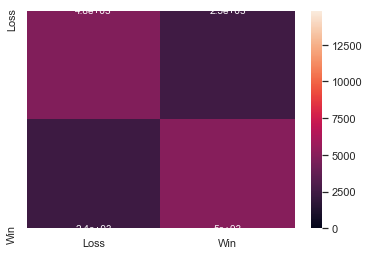

In [22]:
gb.analyze()

In [23]:
# ju.plot_2d(X_test, y_predict_gb)

In [24]:
gb.save()

Saving report: ../reports/summary.csv


# AdaBoost

In [25]:
ab = ModelWrapper(AdaBoostClassifier(random_state=RSTATE),
                  description = DESCRIPTION, 
                 data_file = FEATURE_FILE,
                  start_year = START_YEAR,
                  end_year = END_YEAR,
                   X_train = X_train,
                   y_train = y_train,
                   X_test = X_test,
                   y_test = y_test).fit()
y_predict_ab = ab.predict()

Model Score: 0.6629304523970291

ROC/AUC Score: 0.662901963361816
              precision    recall  f1-score   support

        Loss       0.66      0.65      0.66      7381
         Win       0.66      0.67      0.67      7429

    accuracy                           0.66     14810
   macro avg       0.66      0.66      0.66     14810
weighted avg       0.66      0.66      0.66     14810

      Loss   Win
Loss  4828  2553
Win   2439  4990


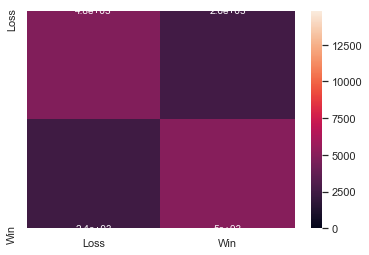

In [26]:
ab.analyze()

In [27]:
# ju.plot_2d(X_test, y_predict_ab)

In [28]:
ab.save()

Saving report: ../reports/summary.csv


# Results

In [29]:
report = pd.read_csv(REPORT_FILE)
report.tail(6)

,model_name,description,data_file,start_year,end_year,accuracy,roc_auc_score,confusion_matrix,classification_report,model_file,predict_time_min,fit_time_min,total_time_min
66,LogisticRegression,diff-ohe-history10_diff,../datasets/atp_matches_1985-2019_features-dif...,1998,2018,0.664821,0.664819,"{""0"": {""0"": 4902, ""1"": 2485}, ""1"": {""0"": 2479,...","{""Loss"": {""precision"": 0.6635982130770272, ""re...",../models/logisticregression-1998-2018-diff-oh...,0.0,0.0,0.0
67,KNeighborsClassifier,diff-ohe-history10_diff,../datasets/atp_matches_1985-2019_features-dif...,1998,2018,0.614112,0.614089,"{""0"": {""0"": 4479, ""1"": 2813}, ""1"": {""0"": 2902,...","{""Loss"": {""precision"": 0.6142347778387274, ""re...",../models/kneighborsclassifier-1998-2018-diff-...,0.0,0.0,0.0
68,DecisionTreeClassifier,diff-ohe-history10_diff,../datasets/atp_matches_1985-2019_features-dif...,1998,2018,0.584132,0.584130,"{""0"": {""0"": 4305, ""1"": 3083}, ""1"": {""0"": 3076,...","{""Loss"": {""precision"": 0.5827016783974012, ""re...",../models/decisiontreeclassifier-1998-2018-dif...,0.0,0.0,0.0
69,RandomForestClassifier,diff-ohe-history10_diff,../datasets/atp_matches_1985-2019_features-dif...,1998,2018,0.628494,0.628717,"{""0"": {""0"": 5148, ""1"": 3269}, ""1"": {""0"": 2233,...","{""Loss"": {""precision"": 0.6116193418082452, ""re...",../models/randomforestclassifier-1998-2018-dif...,0.0,0.0,0.0
70,GradientBoostingClassifier,diff-ohe-history10_diff,../datasets/atp_matches_1985-2019_features-dif...,1998,2018,0.666509,0.666475,"{""0"": {""0"": 4841, ""1"": 2399}, ""1"": {""0"": 2540,...","{""Loss"": {""precision"": 0.668646408839779, ""rec...",../models/gradientboostingclassifier-1998-2018...,0.0,7.0,7.0
71,AdaBoostClassifier,diff-ohe-history10_diff,../datasets/atp_matches_1985-2019_features-dif...,1998,2018,0.662930,0.662902,"{""0"": {""0"": 4828, ""1"": 2439}, ""1"": {""0"": 2553,...","{""Loss"": {""precision"": 0.6643731938901886, ""re...",../models/adaboostclassifier-1998-2018-diff-oh...,0.0,1.0,1.0


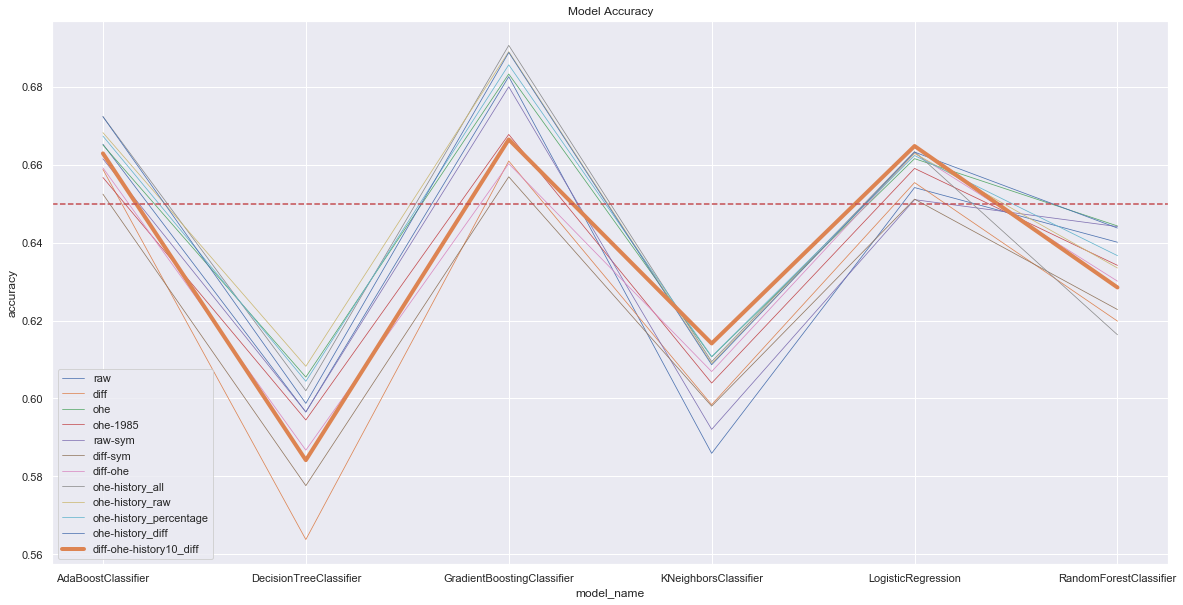

In [30]:
f, a = plt.subplots(1, 1, figsize=(20, 10))

descs = report.description.unique()

for desc in descs:
    report_desc = report[report.description == desc]
    if desc == DESCRIPTION:
        sns.lineplot(x="model_name", y="accuracy", data=report_desc, label=desc, linewidth=4)
    else:
        sns.lineplot(x="model_name", y="accuracy", data=report_desc, label=desc, linewidth=0.75)

a.axhline(0.65, ls='--', color='r')
a.set_title(f"Model Accuracy")
_ = a.legend(loc="lower left")

Best Model: GradientBoostingClassifier


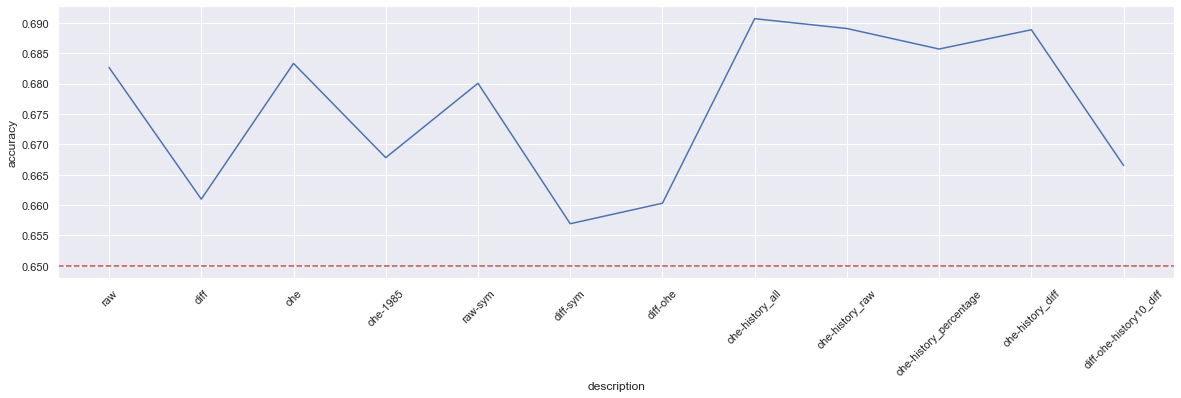

In [31]:
best_model = report.loc[report[report.description == DESCRIPTION].accuracy.idxmax()].model_name
print(f'Best Model: {best_model}')

dt_report = report[(report.model_name == best_model)]

f, a = plt.subplots(1, 1, figsize=(20, 5))
_ = sns.lineplot(x="description", y="accuracy", data=dt_report, ax=a, sort=False)
_ = a.axhline(0.65, ls='--', color='r')
_ = a.set_label(f"{best_model} Accuracy")
_ = plt.xticks(rotation=45)


In [32]:

current_report = report[(report.model_name == best_model) &
                                  (report.description == DESCRIPTION)]
mw = ModelWrapper.get_model_wrapper_from_report(current_report)


In [33]:
import shap

shap.initjs()

explainer = shap.TreeExplainer(mw.model, data=X_train.values)
shap_values = explainer.shap_values(X_test.values)

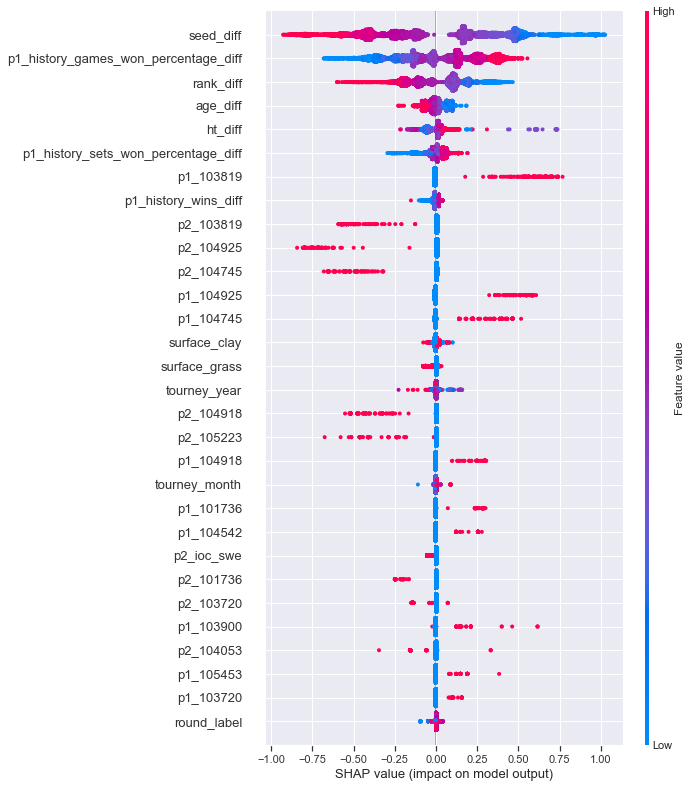

In [34]:
shap.summary_plot(shap_values, X_test, max_display=30)

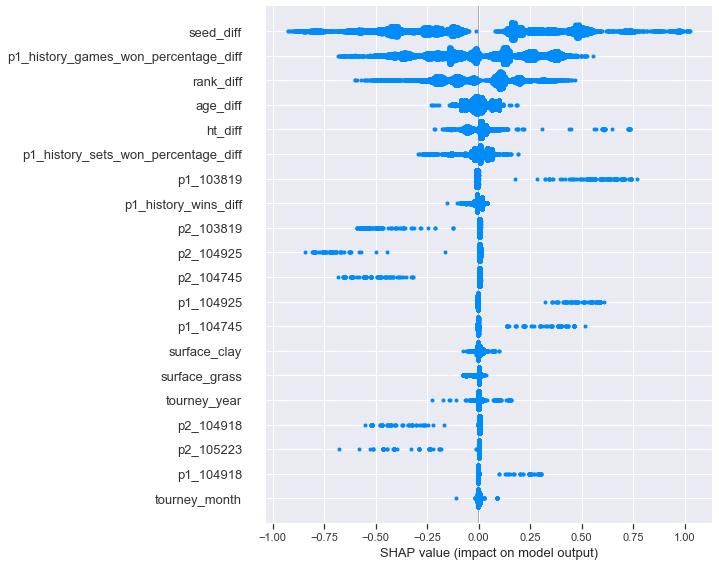

In [35]:
shap.summary_plot(shap_values, feature_names=X_test.columns, title="Feature Importance")

In [36]:
print(f'Last Finished: {datetime.now().strftime("%Y-%m-%d %H:%M")}')

Last Finished: 2019-10-21 03:19
